# Knowledge 9 - Configurar cores no matplotlib

https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [30]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [31]:
cotacoes = yf.download(["WEGE3.SA"])['Close']

/tmp/ipykernel_23591/4242900898.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(["WEGE3.SA"])['Close']
[*********************100%***********************]  1 of 1 completed


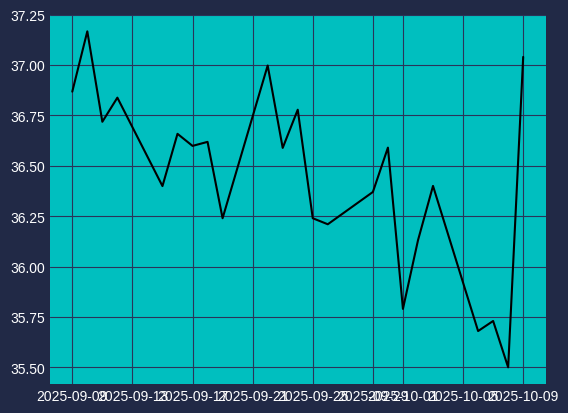

In [32]:
#trocando a cor pelo nome

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = "black")
ax.set_facecolor('c')

# Cores por código

https://www.hexcolortool.com/#42eaf0

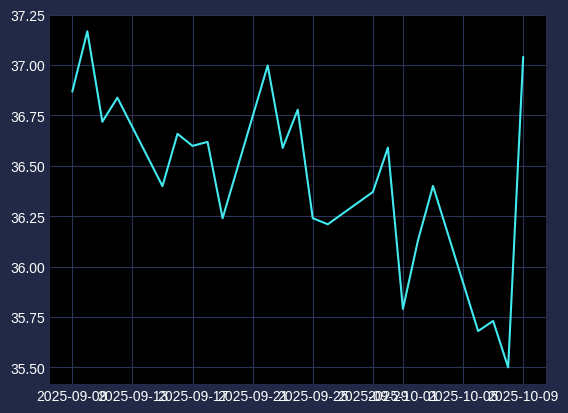

In [33]:
#trocando a cor pelo código da cor

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = "#42eaf0")
ax.set_facecolor('black')

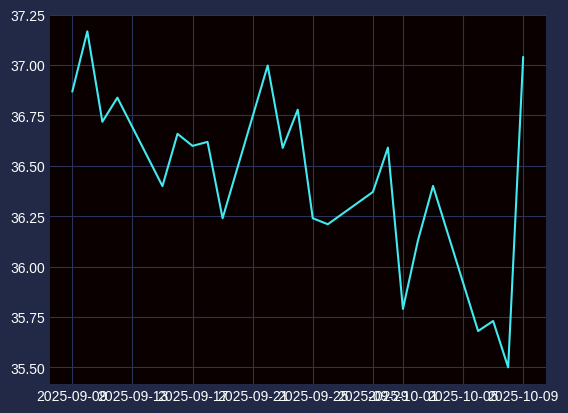

In [34]:
#trocando a cor pelo número da cor

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = (65/255, 234/255, 240/255))
ax.set_facecolor((10/255, 0/255, 0/255))



# Configurando cores por estilos

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

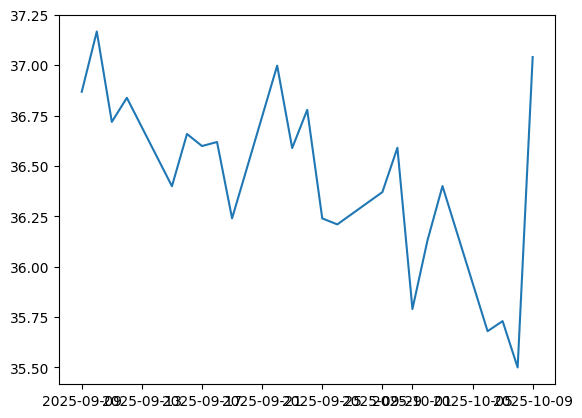

In [36]:
plt.style.use("default")
#plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)

In [37]:
!pip install -q mplcyberpunk

In [38]:
import mplcyberpunk
import matplotlib.ticker as mtick

plt.style.use("cyberpunk")

/tmp/ipykernel_23591/819915269.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(["WEGE3.SA", "PETR4.SA"])['Close']
[*********************100%***********************]  2 of 2 completed


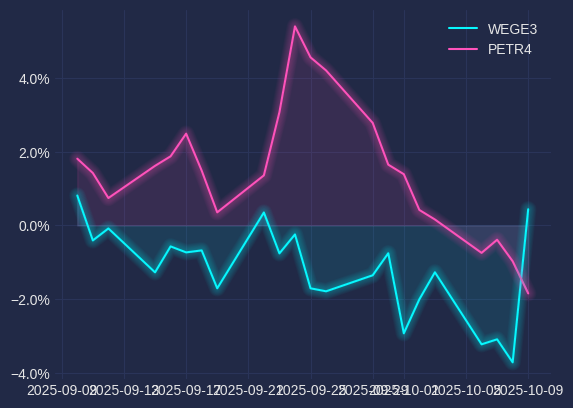

In [39]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA"])['Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

ax.plot(retornos_acum.index, retornos_acum['WEGE3.SA'], label = "WEGE3")
ax.plot(retornos_acum.index, retornos_acum['PETR4.SA'], label = "PETR4")
ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

mplcyberpunk.add_glow_effects()

plt.show()

/tmp/ipykernel_23591/1811315516.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(acoes)['Close']
[*********************100%***********************]  4 of 4 completed


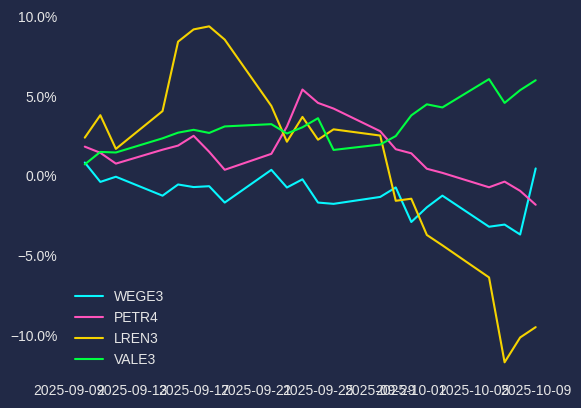

In [40]:
acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA"]

cotacoes = yf.download(acoes)['Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

for acao in acoes:

    ax.plot(retornos_acum.index, retornos_acum[acao], label = acao.replace(".SA", ""))

ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(False)


plt.show()

# Exercícios

* Exercício 100: Puxe as cotações de 4 ações a sua escolha, calcule a correlação de 12 meses das ações com o ibovespa e plote um gráfico dessas correlações, escolhendo as cores das linhas a sua escolha.

* Exercício 101: Crie o mesmo gráfico utilizando o estilo Cyberpunk. 

In [41]:
import matplotlib.dates as mdate

/tmp/ipykernel_23591/3000668843.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(acoes)['Close']
[*********************100%***********************]  5 of 5 completed


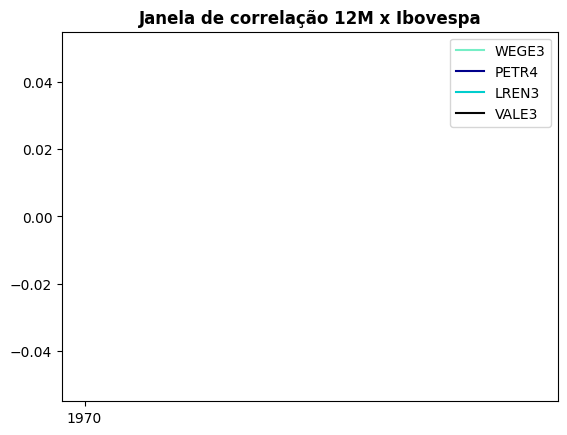

In [42]:
plt.style.use("default")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")

cores = ['#76EEC6', '#00008B', '#00CDCD', '#050505']

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""), color = cores[i])

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()

/tmp/ipykernel_23591/719456938.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(acoes)['Close']
[*********************100%***********************]  5 of 5 completed


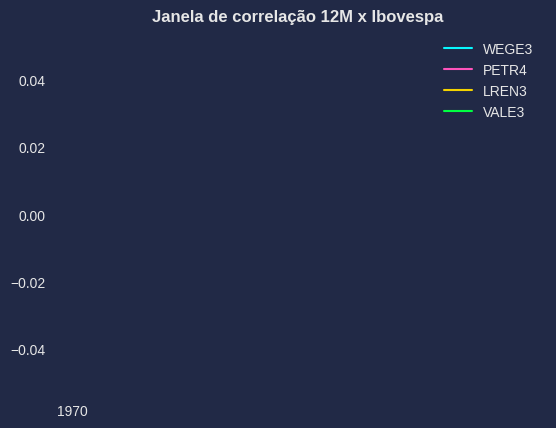

In [43]:
#gabarito 101

plt.style.use("cyberpunk")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""))

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()

# Knowledge 10

Gráfico de barras